## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_data.shape

(1893, 8)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.duplicated(subset=["Mouse ID", "Timepoint"]).sum()

5

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(["Mouse ID", "Timepoint"])

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_data.shape

(1888, 8)

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_median = clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_varience = clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_std_dev = clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_sem = clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Varience": drug_varience,
    "Standard Deviation": drug_std_dev,
    "SEM": drug_sem
})

summary_df

,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

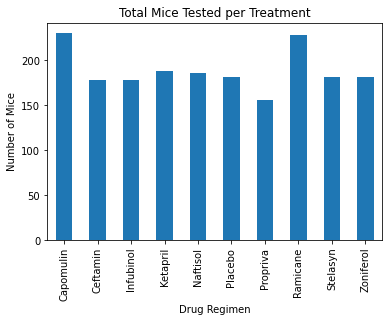

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_data = clean_data.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
bar_plot_data = bar_data.plot.bar(rot="vertical", title="Total Mice Tested per Treatment")

bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Mice")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

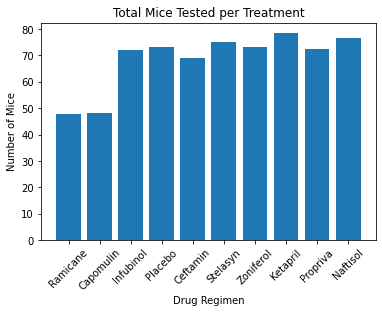

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(clean_data["Drug Regimen"], clean_data["Tumor Volume (mm3)"], align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Mice Tested per Treatment")
plt.xticks(rotation=45)

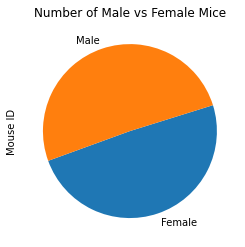

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = clean_data.groupby("Sex").count()["Mouse ID"]
mouse_sex_plot = mouse_sex.plot.pie(y="Sex", title="Number of Male vs Female Mice", startangle=200)

Text(0, 0.5, 'Mouse ID')

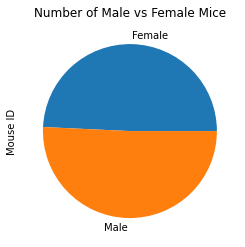

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = clean_data.groupby("Sex").count()["Mouse ID"]
plt.pie(mouse_sex, labels=mouse_sex.index)
plt.title("Number of Male vs Female Mice")
plt.ylabel("Mouse ID")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
rami_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane",:]
infu_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol",:]
ceft_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
capo_max = capo_df.groupby("Mouse ID").max()["Timepoint"]
capo_max_df = pd.DataFrame(capo_max)
capo_max_merge = pd.merge(capo_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

rami_max = rami_df.groupby("Mouse ID").max()["Timepoint"]
rami_max_df = pd.DataFrame(rami_max)
rami_max_merge = pd.merge(rami_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

infu_max = infu_df.groupby("Mouse ID").max()["Timepoint"]
infu_max_df = pd.DataFrame(infu_max)
infu_max_merge = pd.merge(infu_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

ceft_max = ceft_df.groupby("Mouse ID").max()["Timepoint"]
ceft_max_df = pd.DataFrame(capo_max)
ceft_max_merge = pd.merge(ceft_max_df, clean_data, on=("Mouse ID", "Timepoint"), how="left")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
